# 16 Recommendation System 

### Data Description:
- Unique ID of each anime.
- Anime title.
- Anime broadcast type, such as TV, OVA, etc.
- anime genre.
- The number of episodes of each anime.
- The average rating for each anime compared to the number of users who gave ratings.
- Number of community members for each anime.

### Objective:
- The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset. 
### Dataset:
- Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

### Tasks:
#### Data Preprocessing:
- Load the dataset into a suitable data structure (e.g., pandas DataFrame).
- Handle missing values, if any.
- Explore the dataset to understand its structure and attributes.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


#### Handle missing values, if any.

In [4]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
df1 = df.fillna(df.mean(numeric_only=True)) # for numerical columns

In [6]:
df1.isnull().sum()

anime_id     0
name         0
genre       62
type        25
episodes     0
rating       0
members      0
dtype: int64

In [7]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = df1[col].fillna(df1[col].mode()[0]) # for categorical columns
df1.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
df1.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

#### Explore the dataset to understand its structure and attributes.

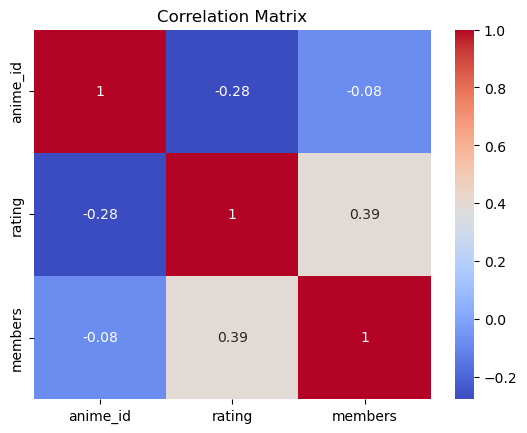

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### Feature Extraction:
- Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
- Convert categorical features into numerical representations if necessary.
- Normalize numerical features if required.

### Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
- Choose features that best represent each anime. Common useful features:
    - Genres (categorical, e.g., 'Action, Comedy')
    - Type (categorical, e.g., 'TV', 'Movie')
    - Episodes (numerical)
    - Rating (numerical, e.g., 7.89)
    - Members (numerical: popularity)

In [10]:
df2 = df1.drop(['anime_id','name','genre'],axis='columns')
df2.head()

,type,episodes,rating,members
0,Movie,1,9.37,200630
1,TV,64,9.26,793665
2,TV,51,9.25,114262
3,TV,24,9.17,673572
4,TV,51,9.16,151266


### Convert categorical features into numerical representations if necessary.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df2['type'] = le.fit_transform(df2['type'])
df2.head(3)

,type,episodes,rating,members
0,0,1,9.37,200630
1,5,64,9.26,793665
2,5,51,9.25,114262


In [12]:
for col in df2.columns:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')  # convert, set 'Unknown' to NaN
    df2[col].fillna(df2[col].median(), inplace=True)     # replace NaN with median

C:\Users\shivi\AppData\Local\Temp\ipykernel_20952\2443108557.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].median(), inplace=True)     # replace NaN with median


#### Normalize numerical features if required.

In [13]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

num_col = ['episodes','rating','members']
df_scaled = mms.fit_transform(df2[num_col])
df_scaled

array([[0.00000000e+00, 9.24369748e-01, 1.97872202e-01],
       [3.46725371e-02, 9.11164466e-01, 7.82770102e-01],
       [2.75178866e-02, 9.09963986e-01, 1.12689267e-01],
       ...,
       [1.65107320e-03, 3.85354142e-01, 2.11063682e-04],
       [0.00000000e+00, 3.97358944e-01, 1.67667411e-04],
       [0.00000000e+00, 4.54981993e-01, 1.35120208e-04]])

In [14]:
df_scaled = pd.DataFrame(df_scaled, columns=['Episodes', 'Rating', 'Members'])
df_scaled.head()

,Episodes,Rating,Members
0,0.000000,0.924370,0.197872
1,0.034673,0.911164,0.782770
2,0.027518,0.909964,0.112689
3,0.012658,0.900360,0.664325
4,0.027518,0.899160,0.149186


In [15]:
final_df = pd.concat([df2, df_scaled], axis=1)
final_df = final_df.drop(['episodes', 'rating', 'members'], axis='columns')
final_df.head()

,type,Episodes,Rating,Members
0,0,0.000000,0.924370,0.197872
1,5,0.034673,0.911164,0.782770
2,5,0.027518,0.909964,0.112689
3,5,0.012658,0.900360,0.664325
4,5,0.027518,0.899160,0.149186


### Recommendation System:
- Design a function to recommend anime based on cosine similarity.
- Given a target anime, recommend a list of similar anime based on cosine similarity scores.
- Experiment with different threshold values for similarity scores to adjust the recommendation list size.
- Analyze the performance of the recommendation system and identify areas of improvement.


#### Design a function to recommend anime based on cosine similarity.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
df = df[['name', 'genre']].dropna()

In [18]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genre'])

In [19]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [28]:
def recommend_anime(title, df, cosine_sim, threshold=0.3, top_n=10):
    if title not in df['name'].values:
        return f"Anime '{name}' not found in dataset."

    idx = df[df['name'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filter scores above threshold and sort
    sim_scores = [x for x in sim_scores if x[1] >= threshold and x[0] != idx]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[:top_n]

    anime_indices = [i[0] for i in sim_scores]
    return df['name'].iloc[anime_indices].tolist()

#### Given a target anime, recommend a list of similar anime based on cosine similarity scores.

In [21]:
recommend_anime("Naruto", df, cosine_sim, threshold=0.2, top_n=5) # Example usage

['Boruto: Naruto the Movie',
 'Naruto: Shippuuden',
 'Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi',
 'Naruto x UT',
 'Naruto: Shippuuden Movie 4 - The Lost Tower']

#### Experiment with different threshold values for similarity scores to adjust the recommendation list size.

In [22]:
for t in [0.1, 0.2, 0.3, 0.4]:
    print(f"Threshold: {t}")
    print(recommend_anime("Naruto", df, cosine_sim, threshold=t))
    print("-"*30)

Threshold: 0.1
['Boruto: Naruto the Movie', 'Naruto: Shippuuden', 'Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi', 'Naruto x UT', 'Naruto: Shippuuden Movie 4 - The Lost Tower', 'Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono', 'Naruto Shippuuden: Sunny Side Battle', 'Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!!', 'Kyutai Panic Adventure!', 'Naruto: Shippuuden Movie 6 - Road to Ninja']
------------------------------
Threshold: 0.2
['Boruto: Naruto the Movie', 'Naruto: Shippuuden', 'Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi', 'Naruto x UT', 'Naruto: Shippuuden Movie 4 - The Lost Tower', 'Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono', 'Naruto Shippuuden: Sunny Side Battle', 'Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!!', 'Kyutai Panic Adventure!', 'Naruto: Shippuuden Movie 6 - Road to Ninja']
------------------------------
Threshold: 0.3
['Boruto: Naruto the Movie', 'Naruto: Shippuuden', 'Bor

#### Analyze the performance of the recommendation system and identify areas of improvement.

In [23]:
x = final_df.drop('type', axis='columns') # Split the dataset into training and testing sets.
y = final_df.type

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = clf.predict(x_test)
y_pred

array([3, 5, 5, ..., 0, 4, 5])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Evaluation Metrics:
Accuracy: 0.5978039853599024
Precision: 0.5758896830450527
Recall: 0.5978039853599024
F1 Score: 0.5839914950521757


#### Analyze the performance of the recommendation system and identify areas of improvement.
- Precision: Good if we only want to recommend anime the user is likely to enjoy.
- Recall: Can be improved if we're missing good suggestions — try boosting models like XGBoost.
- F1 Score: A balance between the two.
| Area                | Solution                                            |
| ------------------- | --------------------------------------------------- |
| Sparse ratings      | Use collaborative filtering or matrix factorization |
| Feature limitations | Add more features like user age, tags, reviews      |
| Cold start          | Use content-based filtering (e.g., genre/type)      |
| Personalization     | Add user preferences/history                        |
| Model tuning        | Try XGBoost, tune hyperparameters                   |

### Interview Questions:
#### 1. Can you explain the difference between user-based and item-based collaborative filtering?
##### What is Collaborative Filtering?
- Collaborative filtering recommends items to a user based on the preferences of other users or similarities between items, 
- assuming that users who liked similar things in the past will like similar things in the future.

| Feature                       | User-Based CF                      | Item-Based CF                   |
| ----------------------------- | ---------------------------------- | ------------------------------- |
| Based on                      | Similar users                      | Similar items                   |
| Computation                   | User-user similarity               | Item-item similarity            |
| Performance on large datasets | Slower (many users)                | Faster (fewer items)            |
| Cold start                    | Struggles with new users           | Struggles with new items        |
| Real-world usage              | Less common                        | More widely used (e.g., Amazon) |
| Stability                     | Unstable with user behavior shifts | More stable                     |

#### 2. What is collaborative filtering, and how does it work?
##### Definition:
- Collaborative Filtering (CF) is a recommendation technique that suggests items to a user based on the preferences or behavior of other users — relying purely on user-item interaction data (like ratings, clicks, purchases), not on item content.

##### 1. User-Based Collaborative Filtering
-  Find users similar to the target user.
- Recommend items that those similar users liked.

##### Steps:
- Build a user-item matrix (rows = users, columns = items).
- Compute similarity between users (cosine, Pearson).
- Find nearest neighbors (top similar users).
- Predict and recommend items liked by those neighbors.

##### 2. Item-Based Collaborative Filtering
- Find items similar to those the target user liked.
- Recommend those similar items.

##### Steps:
- Use the same user-item matrix.
- Compute item-item similarity (based on users who rated them).
- Find items similar to those the user liked.
- Recommend those items.
| Type             | Input Data                 | Examples                                     |
| ---------------- | -------------------------- | -------------------------------------------- |
| **Memory-based** | User-item interactions     | User-user, Item-item CF                      |
| **Model-based**  | Learn patterns from data   | Matrix Factorization (SVD), KNN, Neural Nets |
| **Hybrid**       | Combine with content-based | Netflix, YouTube, Spotify                    |